Taller 2
======

El objetivo del taller es ganar un entendimiento más profundo de los temas que entran en el segundo parcial.
Por tal motivo, se deben resolver los siguientes ejercicios y responder las preguntas justificando adecuadamente.


## Ejercicio 1
Dada la siguiente matriz
$$
A =
\begin{pmatrix}
	1 & \sqrt{3} & 0 \\
	\sqrt{3} & 4 & \sqrt{3}/2 \\
	0 & \sqrt{3}/2 & 7/4
\end{pmatrix}
$$

Hallar $A = U \Sigma V^t$ la descomposición en valores singulares de $A$ utilizando únicamente la función `eig` de Numpy para calcular los autovalores y autovectores necesarios. Para lo anterior, considerar alguna propiedad de la matriz que pueda resultar de utilidad para simplificar los cálculos y justificar.



In [0]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [141]:
A = np.array([[1,          np.sqrt(3),   0           ],
              [np.sqrt(3), 4,            np.sqrt(3)/2],
              [0,          np.sqrt(3)/2, 7/4         ]])



S,U = eig(A) #autovalores
#como A es simetrica, A@A.transpose() = A**2 entonces los autovectores de norma de A son los mismos que A@AT
# A*At = USVt * (USVt)t => (A simetrica) A**2 = (USVt)**2 => A = USVt
#U = A*At, V = At*A => U = V por A simetrica


D = np.asmatrix(np.diag(S))
np.allclose(U@D@U.transpose(), A)

True

## Ejercicio 2


Dado el siguiente sistema lineal sobredeterminado:

$$
A x = b \\
\begin{pmatrix}
1  & 0  & 0 \\
0  & 1  & 0 \\
0  & 0  & 1 \\
-1 & 1  & 0 \\
0  & -1 & 0 \\
-1 & 0  & 1
\end{pmatrix}
%
\begin{pmatrix}
x_a \\
x_b \\
x_c
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 
2 \\ 
3 \\
1 \\
2 \\
1
\end{pmatrix}
$$

- Hallar $x^*$ mediante cuadrados mínimos (utilizando ecuaciones normales). ¿Bajo que condiciones esta solución es única?

- Probar que si $x^*$, solución de cuadrados mínimos,  verifica $r = b-Ax^*$ , es ortogonal  a $Im(A)$. ¿A qué subespacio
pertenece el residuo?

- Dar una interpretación geométrica de la solución de cuadrados mínimos lineales para este ejemplo.



In [40]:
eps = 1e10-10
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [-1,1, 0],
              [0,-1, 0],
              [-1,0, 1]])

b = np.array([1, 2, 3, 1, 2, 1])

#At.A.x = At.b
AT = A.transpose()
x = np.linalg.solve(AT@A,AT@b)
#si las columnas de AtA son li, la solucion es unica, porque sino son ld, y hay mas variables que ecuaciones.

r = b- A@x
#r pertenece al subespacio ortogonal a la imagen de A, o en el nucleo de A(ortogonal)

C = r.transpose()@A
print (np.linalg.norm(C,1) <= eps)

True


## Ejercicio 3

- Completar los métodos de Jacobi y Gauss-Seidel. Tener en cuenta que las funciones también deben devolver el vector de errores que resulta de comparar la solución aproximada de una iteración contra una solución $x\_direct$.
-Probar los métodos con la matriz A (definida en el código), graficar y  analizar el error de la solución



In [0]:
def jacobi(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativo
    
    D = np.diag(np.diag(A))
    L = (-1)*(np.tril(A) - D)
    U = (-1)*(np.triu(A) - D)
    
    T = np.linalg.inv(D)@(L+U)
    c = np.linalg.inv(D)@b
    c = np.reshape(c, (-1,1))
    
    B,z= eig(T)
    print((np.abs(B)).tolist())
    
    xi = (T@x_ini)+c
    error = []
    for i in range(reps):
        xi = (T@xi) + c
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error



In [0]:
def gauss_seidel(A,b,reps,x_ini,x_direct):
    # Matrices para los metodos iterativos
    
    D = np.diag(np.diag(A))
    L = (-1)*(np.tril(A) - D)
    U = (-1)*(np.triu(A) - D)
    
    E = D-L
    T = np.linalg.inv(E)@U
    c = np.linalg.inv(E)@b
    c = np.reshape(c, (-1,1))
    
    B,z = eig(T)
    print((np.abs(B)).tolist())
    
    xi = (T@x_ini) + c
    
    error = []
    for i in range(reps):
        xi = T@xi + c
        error.append(np.linalg.norm(xi - x_direct))
    return xi, error


[-0.7146350216679591, 0.012325072413094655, 0.7023099492548642]
Jacobi:
Estimacion: [[ 0.74628648]
 [-1.36616872]
 [ 2.88528748]]
Respuesta correcta [[ 0.74628648]
 [-1.36616872]
 [ 2.88528748]]


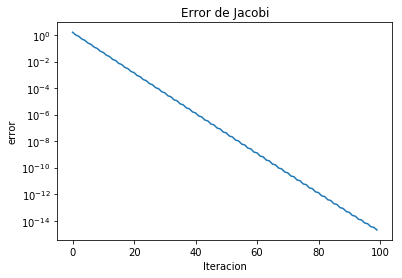

In [185]:
#Pruebo con una matriz edd, ambos deberían converger.
A = np.array([[8,np.sqrt(2),1/3],
              [np.sqrt(3),10, 5.5],
              [0, 1 , 7/6]])
b = np.array([5,3.5,2])

x_ini = np.array([0,0,0])
x_ini = np.reshape(x_ini, (-1,1))
x = np.linalg.solve(A,b)
x = np.reshape(x, (-1,1))
x_jacobi, error = jacobi(A,b,100,x_ini,x)

print("Jacobi:")
print("Estimacion:", x_jacobi)
print("Respuesta correcta", x)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()




[0.0, 5.551115123125783e-17, 0.49586129747204377]
Gauss-Seidel:
Estimacion: [[ 0.74628648]
 [-1.36616872]
 [ 2.88528748]]
Respuesta correcta [[ 0.74628648]
 [-1.36616872]
 [ 2.88528748]]


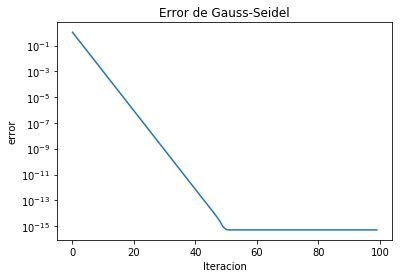

In [186]:
#Idem para gauss-seidel
x_gs, error = gauss_seidel(A,b,100,x_ini,x)

print("Gauss-Seidel:")
print("Estimacion:", x_gs)
print("Respuesta correcta", x)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()



## Ejercicio 4


Considerar los siguientes datos que fueron generados a partir de un polinomio de grado 2 con ruido. Los mismos serán los datos a ajustar utilizando cuadrados mínimos lineales.

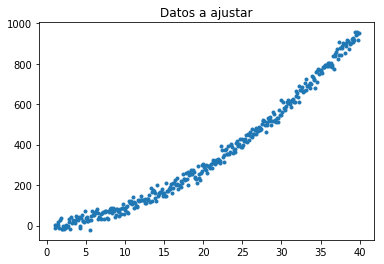

In [214]:

x = np.arange(1, 40, 0.1)
y = 4 * x + 0.5 * x ** 2 + np.random.randn(*x.shape) * 20;

plt.plot(x, y, '.')
plt.title('Datos a ajustar')
plt.show()

Ahora, vamos a fittear un polinomio de grado 4 a los datos anteriores (asumiendo que desconocemos el origen de los mismo). Para esto, utilizamos cuadrados mínimos, cuya solución es hallada a través de ecuaciones normales resueltas por algún  método directo

In [0]:
M = np.stack([x, x ** 2, x ** 3, x ** 4]).T
c = y

AtA = M.T @ M 
Atb = M.T @ c


x_direct = np.linalg.solve(AtA,Atb)





- Estimar la solución de cuadrados mínimos utilizando los métodos iterativos del punto 3 y graficar los errores de los métodos (con respecto a la solución hallada con método directo) en función de las iteraciones.
- Indicar si los métodos convergen o no y por qué. Justificar adecuadamente.



[2.8447444076667963, 0.8485421364258248, 0.9962425704868834, 0.9999597007540884]
Jacobi:
Estimacion: [[4.70846890e+05]
 [1.58785376e+04]
 [4.68249575e+02]
 [1.30255874e+01]]
Respuesta correcta [ 4.46453427e+00  4.40259176e-01  2.40258064e-03 -3.29257616e-05]


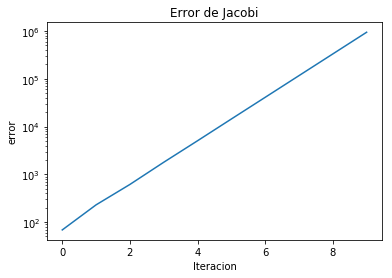

In [189]:
#Jacobi
x_ini = np.array([0,0,0,0])
x_ini = np.reshape(x_ini, (-1,1))
reps = 100
x_jacobi, error = jacobi(AtA,Atb,10,x_ini,x_direct)


print("Jacobi:")
print("Estimacion:", x_jacobi)
print("Respuesta correcta", x_direct)

plt.plot(error)
plt.title("Error de Jacobi")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()



[0.0, 0.8255578374966274, 0.9937427156561908, 0.999919218909844]
Gauss-Seidel:
Estimacion: [[ 4.47214699e+00]
 [ 4.39171864e-01]
 [ 2.44855578e-03]
 [-3.35236041e-05]]
Respuesta correcta [ 4.46453427e+00  4.40259176e-01  2.40258064e-03 -3.29257616e-05]


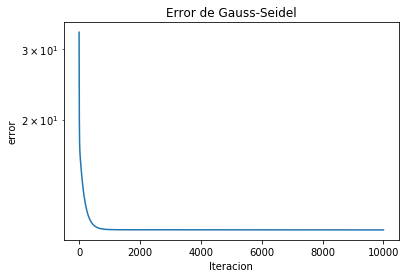

In [215]:
#gauss-seidel
x_ini = np.array([0,0,0,0])
x_ini = np.reshape(x_ini, (-1,1))
reps = 100
x_gs, error = gauss_seidel(AtA,Atb,10000,x_ini,x_direct)

print("Gauss-Seidel:")
print("Estimacion:", x_gs)
print("Respuesta correcta", x_direct)

plt.plot(error)
plt.title("Error de Gauss-Seidel")
plt.xlabel("Iteracion")
plt.ylabel("error")
plt.yscale('log')
plt.show()


- A partir de lo anterior, fittear la función estimada a los datos. Mostrar en un gráfico.
- ¿Qué puede decir sobre los valores estimados de los coeficientes de mayor grado?


In [211]:

x_gs

array([[ 4.47214699e+00],
       [ 4.39171864e-01],
       [ 2.44855578e-03],
       [-3.35236041e-05]])

(390,)
[4.47214699, 0.439171864, 0.00244855578, -3.35236041e-05]


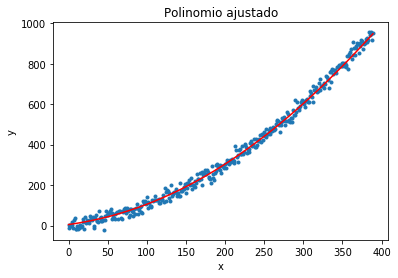

In [216]:

plt.plot(y, '.')
coef = [ 4.47214699e+00,
        4.39171864e-01,
        2.44855578e-03,
       -3.35236041e-05]# COMPLETAR con un vector de longitud 4 con los coeficientes estimados en el ítem anterior
print(x.shape)
print(coef)
pred = coef[0] * x + coef[1] * x**2 + coef[2] * x**3 + coef[3]* x**4
plt.plot(pred, 'r')
plt.title("Polinomio ajustado")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Evaluación y entrega

- La evaluación será mediante un coloquio con los docentes durante la clase.
- El taller se realiza en grupos. Se recomienda que sean los mismos de los TPs.
- En caso de no asistir a clase, se debe entregar la resolución del taller por mail a `metnum.lab@gmail.com` hasta el día **Domingo 2 de Junio de 2019** justificando todas las respuestas.
